In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5


Cloning into 'yolov5'...


HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [2]:
conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
!pip install -qr requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0+cpu CPU


In [3]:
!pip install -q roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="aSBxuf63O69YnAultI1I")
project = rf.workspace("karel-cornelis-q2qqg").project("aicook-lcv4d")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aicook-3 in yolov5pytorch:: 100%|██████████████| 6112/6112 [00:02<00:00, 2132.92it/s]


In [5]:
%cd C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5

C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5


In [9]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

UsageError: Line magic function `%cat` not found.


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [6]:
# define number of classes based on YAML
import yaml
with open("C:\\Users\\jasra\\OneDrive\\Desktop\\mmdp_project\\tete\\yolov5\\aicook-3\\data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5s.yaml

UsageError: Line magic function `%cat` not found.


In [8]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [9]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/models/custom_yolov5s.yaml'

## TRAINING MODEL


In [1]:
%cd C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5

C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5


In [9]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [10]:
%%time
!python train.py --img 640 --batch 16 --epochs 30 --data C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5\aicook-3\data.yaml --weights yolov5s.pt --cache

Wall time: 22.7 s


train: weights=yolov5s.pt, cfg=, data=C:\Users\jasra\OneDrive\Desktop\mmdp_project\tete\yolov5\aicook-3\data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 168 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-72-g064365d Python-3.9.7 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

# Evaluate Custom YOLOv5 Detector Performance

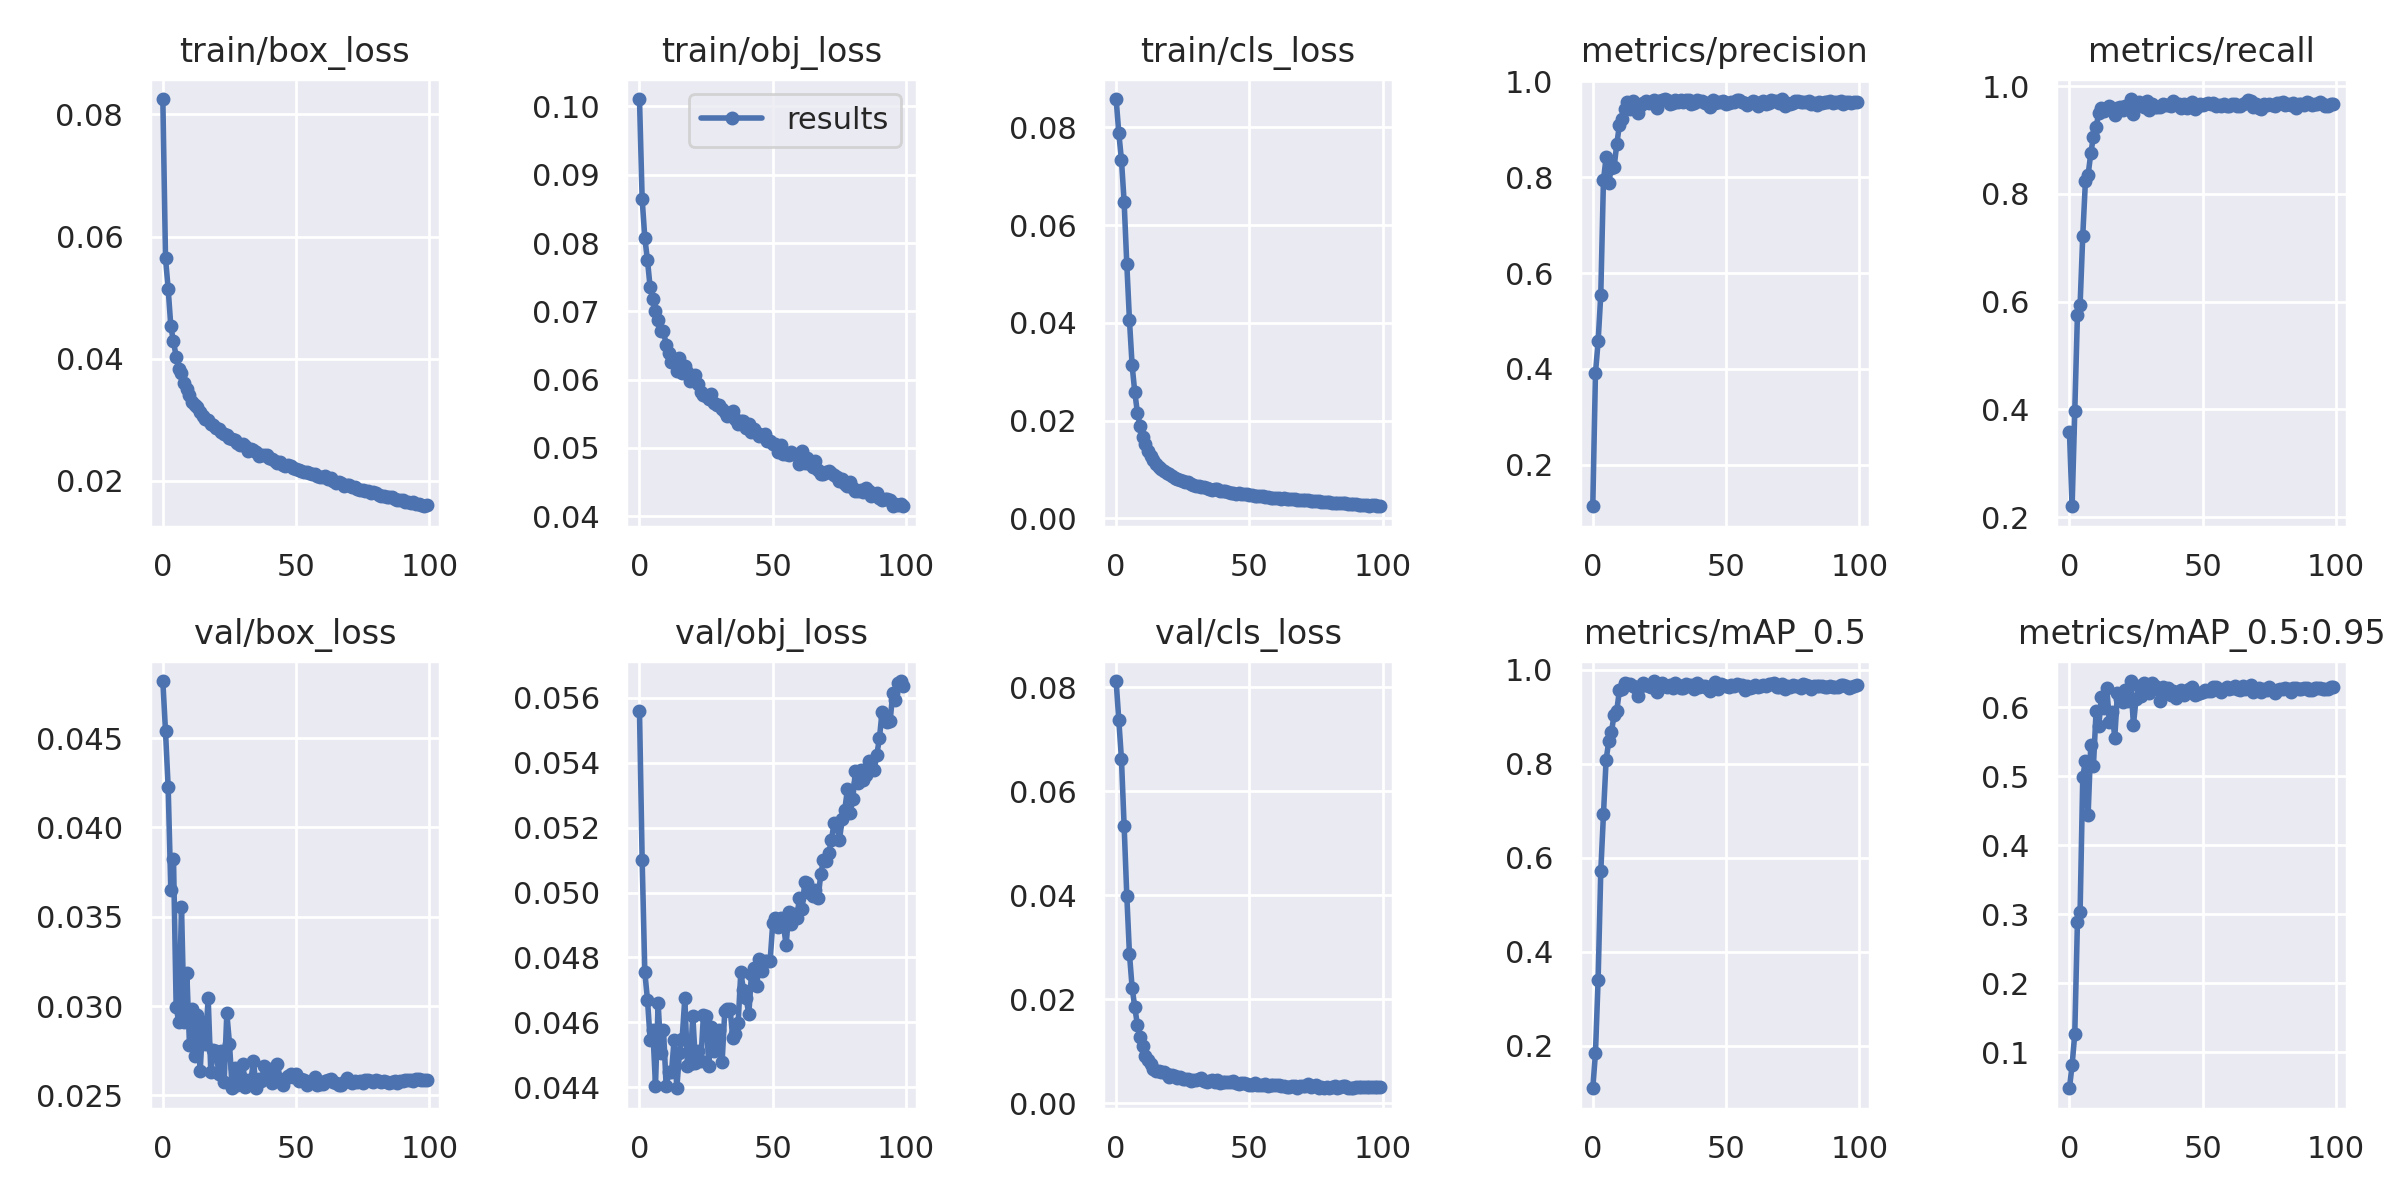

In [9]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

TEST BY CUSTOM IMAGE


In [33]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 1280 --conf 0.25 --source ../test2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../test2.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7091035 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/test2.jpg: 1280x1280 1 blueberries, 1 chicken, 1 chicken_breast, 1 corn, 1 eggs, 1 flour, 1 ground_beef, 1 milk, 1 potato, 1 sweet_potato, 1 tomato, 34.2ms
Speed: 1.5ms pre-process, 34.2ms inference, 71.5ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp16
1 labels saved to runs/detect/exp16/labels
